In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

df = pd.read_pickle("../data/interim/merged_data.pkl")

df = df.rename(columns={"Categories": "Company"})
df = df.rename(columns={"Genres": "Categories"})
df = df.rename(columns={"Tags": "Genres"})

dataset1 = pd.read_csv("../data/raw/games.csv", index_col=False) # update 5 months ago
dataset1 = dataset1[[
    "AppID",
    "Supported languages",
    "Screenshots"

]]
dataset1 = dataset1.rename(columns={"AppID": "app_id"})
dataset1 = dataset1.rename(columns={"Supported languages": "Description"})
dataset1 = dataset1.rename(columns={"Screenshots": "Tags"})

mDataSet = pd.merge(df, dataset1, on="app_id", how="outer", indicator=True)

print(f"df: {len(df)} rows")
print(f"dataset1: {len(dataset1)} rows")
print(f"mDataSet: {len(mDataSet)} rows")

print(mDataSet.head())



C:\Users\lotec\AppData\Local\Temp\ipykernel_8596\1128341129.py:13: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dataset1 = pd.read_csv("../data/raw/games.csv", index_col=False) # update 5 months ago


df: 38709 rows
dataset1: 111452 rows
mDataSet: 111452 rows
   app_id release  peak_players title  win  mac linux  user_reviews Company  \
0      10     NaN           NaN   NaN  NaN  NaN   NaN           NaN     NaN   
1      20     NaN           NaN   NaN  NaN  NaN   NaN           NaN     NaN   
2      30     NaN           NaN   NaN  NaN  NaN   NaN           NaN     NaN   
3      40     NaN           NaN   NaN  NaN  NaN   NaN           NaN     NaN   
4      50     NaN           NaN   NaN  NaN  NaN   NaN           NaN     NaN   

  Categories Genres  Price                                        Description  \
0        NaN    NaN    NaN  Play the world's number 1 online action game. ...   
1        NaN    NaN    NaN  One of the most popular online action games of...   
2        NaN    NaN    NaN  Enlist in an intense brand of Axis vs. Allied ...   
3        NaN    NaN    NaN  Enjoy fast-paced multiplayer gaming with Death...   
4        NaN    NaN    NaN  Return to the Black Mesa Research

In [62]:
#Find copies sold and add to ds
def estimate_copies_sold(row):
    year = pd.to_datetime(row["release"]).year
    reviews = row["user_reviews"]

    if year < 2014:
        multiple = 60
    elif 2014 <= year <= 2016:
        multiple = 50
    elif year == 2017:
        multiple = 40
    elif 2018 <= year <= 2019:
        multiple = 35
    else:  # 2019 and later
        multiple = 30

    return reviews * multiple

mDataSet["copies_sold"] = mDataSet.apply(estimate_copies_sold, axis=1)


In [63]:

# fills in missing tags based on descriptions
tag_keywords = {
    "Action": ["fight", "battle", "combat", "shoot", "gun", "war", "weapon", "fast-paced", "platformer"],
    "Adventure": ["explore", "story", "quest", "journey", "narrative", "exploration", "discover"],
    "RPG": ["rpg", "role-playing", "level up", "character", "quest", "fantasy", "loot", "skill tree"],
    "Simulation": ["simulate", "simulation", "build", "management", "tycoon", "farming", "city-builder", "driving"],
    "Strategy": ["strategy", "tactical", "base-building", "turn-based", "real-time", "rts", "tower defense"],
    "Puzzle": ["puzzle", "logic", "brain", "riddle", "match-3", "solve"],
    "Horror": ["zombie", "fear", "scary", "haunted", "ghost", "survival horror", "monster"],
    "Sports": ["sports", "football", "soccer", "basketball", "baseball", "golf", "racing"],
    "Racing": ["race", "racing", "car", "drift", "vehicle", "track"],
    "Casual": ["casual", "relaxing", "idle", "clicker", "simple", "easy", "chill"],
    "Multiplayer": ["multiplayer", "online", "pvp", "co-op", "matchmaking", "team", "competitive"],
    "Singleplayer": ["singleplayer", "solo campaign", "story mode", "offline"],
    "Sandbox": ["sandbox", "open world", "freedom", "creative", "build anything", "exploration"],
    "Shooter": ["shooter", "gun", "fps", "third-person", "sniper", "weapon"],
    "Platformer": ["platformer", "jump", "run", "2d", "side-scrolling", "platform"],
    "Survival": ["survive", "craft", "harvest", "base", "zombie", "post-apocalyptic"],
    "Visual Novel": ["visual novel", "dialogue choices", "dating sim", "romance", "story-driven"],
    "Music": ["music", "rhythm", "beat", "song", "soundtrack", "dance"],
    "VR": ["virtual reality", "vr headset", "oculus", "vive", "immersive"],
}

def generate_tags(description):
    if not isinstance(description, str) or pd.isna(description):
        return ["Uncategorized"]
      
    tags = []
    text = description.lower()
    for tag, words in tag_keywords.items():
        if any(word in text for word in words):
            tags.append(tag)
    return tags if tags else ["Uncategorized"]

  # Only fill in when tags are missing or empty
def fill_missing_tags(row):
    tags = row["Tags"]

    # Handle tags that are NaN, None, empty lists, or numpy arrays
    if (
        isinstance(tags, float) and pd.isna(tags)  # NaN or missing
        or tags is None
        or (isinstance(tags, (list, np.ndarray)) and len(tags) == 0)
    ):
        return generate_tags(row["Description"])
    else:
        return tags
    

mDataSet["Tags"] = mDataSet.apply(fill_missing_tags, axis=1)

In [64]:
mDataSet.head()

,app_id,release,peak_players,title,win,mac,linux,user_reviews,Company,Categories,Genres,Price,Description,Tags,_merge,copies_sold
0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Play the world's number 1 online action game. ...,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",right_only,NaN
1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One of the most popular online action games of...,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",right_only,NaN
2,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",right_only,NaN
3,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,"Action,FPS,Classic,Multiplayer,Shooter,First-P...",right_only,NaN
4,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Return to the Black Mesa Research Facility as ...,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",right_only,NaN


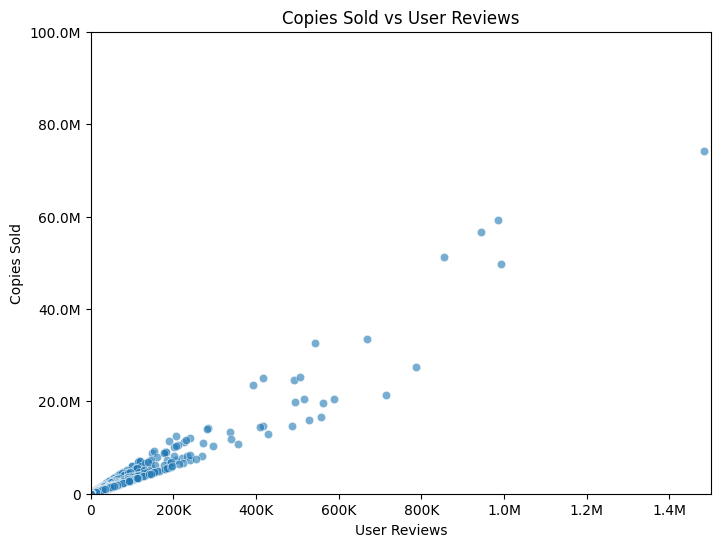

In [65]:
mDataSet[["copies_sold", "user_reviews", "Price"]].corr()


plt.figure(figsize=(8,6))
sns.scatterplot(x="user_reviews", y="copies_sold", data=mDataSet, alpha=0.6)
plt.xlim(0, 1_500_000)
plt.ylim(0, 100_000_000)
ax = plt.gca()
formatter = mticker.FuncFormatter(
    lambda x, _: f"{x/1_000_000:.1f}M" if x >= 1_000_000 else
                 f"{x/1_000:.0f}K" if x >= 1_000 else
                 f"{x:.0f}"
)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)


plt.title("Copies Sold vs User Reviews")
plt.xlabel("User Reviews")
plt.ylabel("Copies Sold")
plt.show()


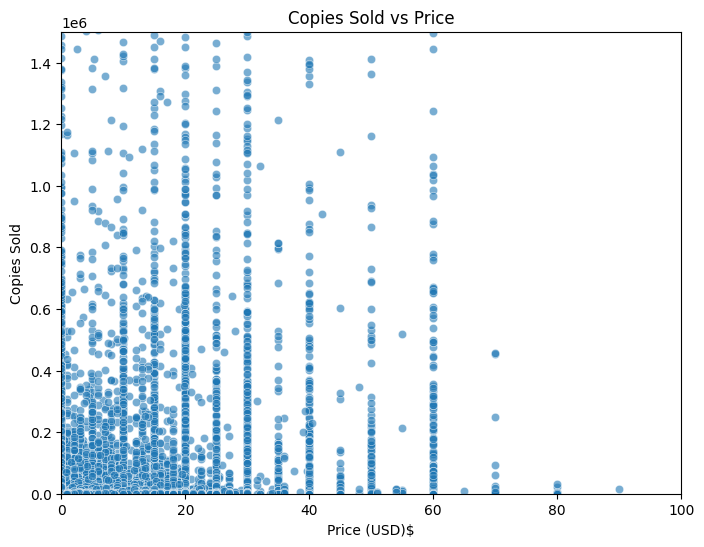

In [66]:
plt.figure(figsize=(8,6))
plt.xlim(0, 100)
plt.ylim(0, 1_500_000)
sns.scatterplot(x="Price", y="copies_sold", data=mDataSet, alpha=0.6)

plt.title("Copies Sold vs Price")
plt.xlabel("Price (USD)$")
plt.ylabel("Copies Sold")
plt.show()

C:\Users\lotec\AppData\Local\Temp\ipykernel_19616\3563111765.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mDataSet.groupby("price_range")


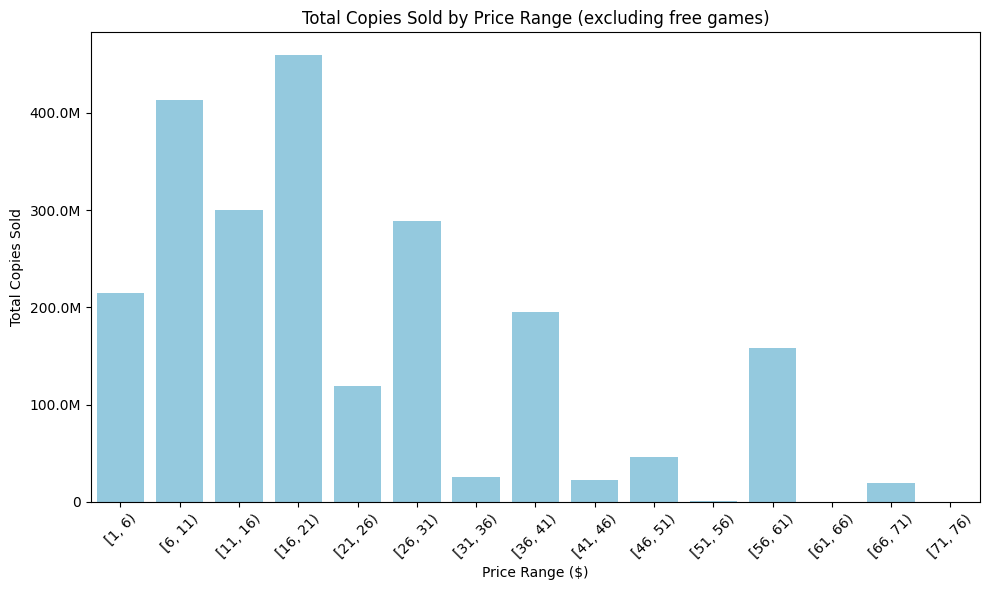

In [67]:
from matplotlib.ticker import EngFormatter
price_bins = np.arange(1, 81, 5)
mDataSet["price_range"] = pd.cut(mDataSet["Price"], bins=price_bins, right=False)

price_summary = (
    mDataSet.groupby("price_range")
      .agg(total_copies_sold=("copies_sold", "sum"),
           avg_copies_sold=("copies_sold", "mean"),
           count_games=("copies_sold", "count"))
      .reset_index()
)

plt.figure(figsize=(10,6))


sns.barplot(x="price_range", y="total_copies_sold", data=price_summary, color="skyblue")
ax = plt.gca()

#Give units to the Y axis
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda y, _: f"{y/1_000_000:.1f}M" if y >= 1_000_000 else
                     f"{y/1_000:.0f}K" if y >= 1_000 else
                     f"{y:.0f}"
    )
)

plt.title("Total Copies Sold by Price Range (excluding free games)")
plt.xlabel("Price Range ($)")
plt.ylabel("Total Copies Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()